In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
import os
from torch import nn
import torch

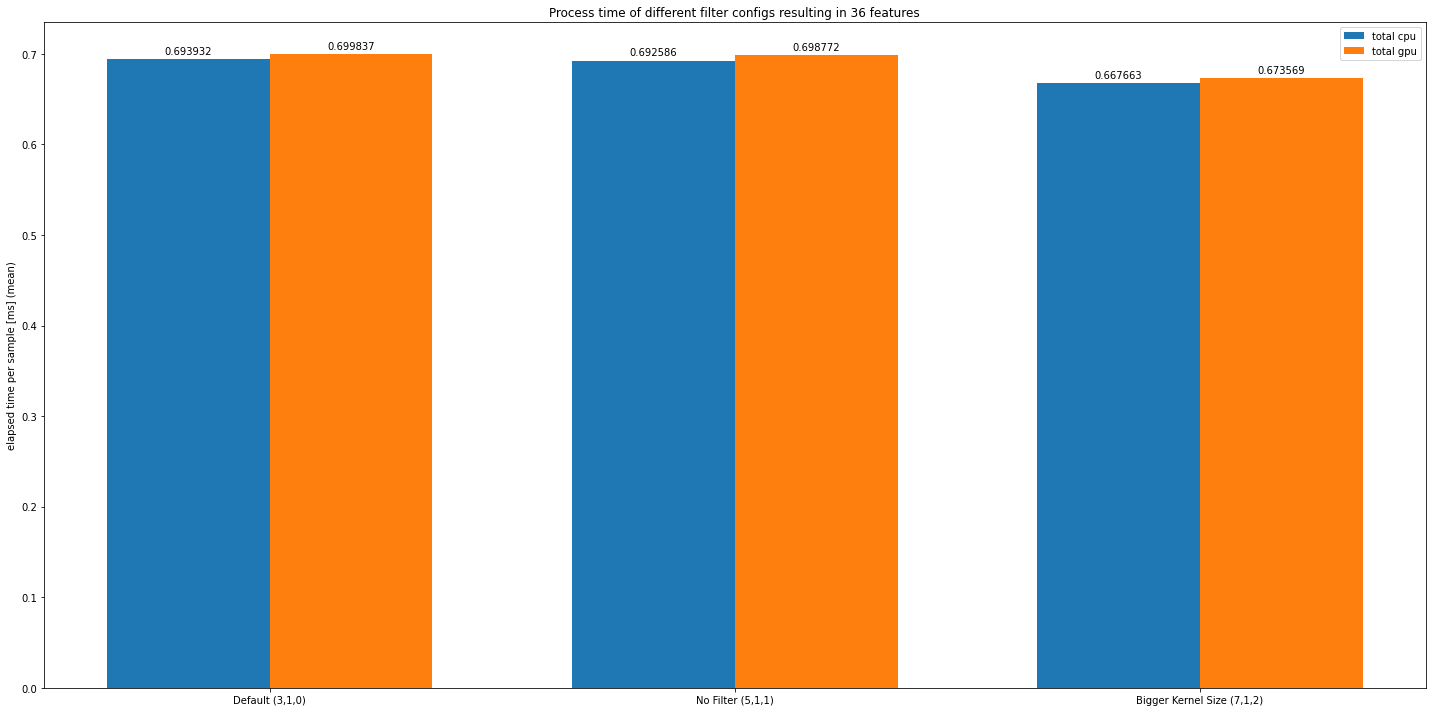

In [7]:
labels = ['Default (3,1,0)', 'No Filter (5,1,1)', 'Bigger Kernel Size (7,1,2)']

base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

data_1 = pd.read_csv(os.path.join(csv_dir, 'kernel_3_padding_0.csv'))
data_2 = pd.read_csv(os.path.join(csv_dir, 'kernel_5_padding_1.csv'))
data_3 = pd.read_csv(os.path.join(csv_dir, 'kernel_7_padding_2.csv'))


all_files = [data_1, data_2, data_3]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
# prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    # prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]
    
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, total_cpu, width, label='total cpu')
rects2 = ax.bar(x + width/2, total_cuda, width, label='total gpu')
# rects3 = ax.bar(x, )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('elapsed time per sample [ms] (mean)')
ax.set_title('Process time of different filter configs resulting in 36 features')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig(os.path.join(plot_dir, '36_features.svg'), bbox_inches = 'tight')

plt.show()

In [12]:
base_dir = "C:\\Users\\uwupl\\IIIT Muen\\PatchCore_anomaly_detection"
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")
res = os.listdir(csv_dir)[0:9]

In [13]:
res

['12.csv',
 '123.csv',
 '1234.csv',
 '13.csv',
 '14.csv',
 '23.csv',
 '234.csv',
 '24.csv',
 '34.csv']

In [23]:
# labels = ['Layer 1','Layer 2', 'Layer 3', 'Layer 4', 'Layer 2 & 3', 'Layer 1 & 2', 'Layer 1 & 3', 'Layer 1 & 3 adapted', 'Layer 1 & 4', 'Layer 2 & 4', 'Layer 3 & 4', 'Layer 1, 2 & 3', 'Layer 2, 3 & 4', 'Layer 1, 2, 3 & 4']

base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
# base_dir = "C:\\Users\\uwupl\\IIIT Muen\\PatchCore_anomaly_detection"
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")
this_csv_dir = os.path.join(csv_dir, "adapt_pool", "new")
labels = os.listdir(this_csv_dir)[0:7]
len(labels)

7

In [24]:
labels[0:7]

['13_adapt.csv',
 '1_1_pool.csv',
 '1_2_pool.csv',
 '1_2_pool_layer123.csv',
 '1_only_1_pool.csv',
 '1_pool.csv',
 '2_pool.csv']

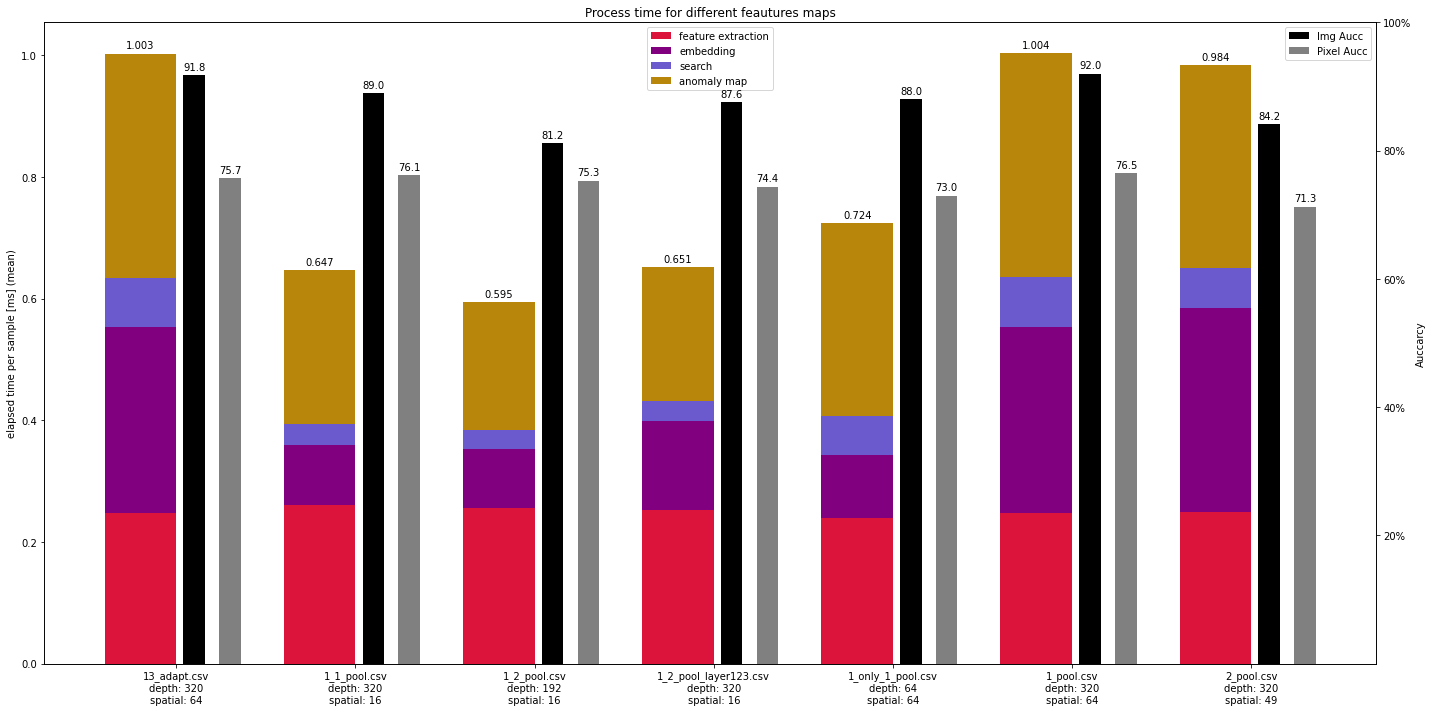

In [25]:

# labels = ['Layer 1','Layer 2', 'Layer 3', 'Layer 4', 'Layer 2 & 3', 'Layer 1 & 2', 'Layer 1 & 3', 'Layer 1 & 3 adapted', 'Layer 1 & 4', 'Layer 2 & 4', 'Layer 3 & 4', 'Layer 1, 2 & 3', 'Layer 2, 3 & 4', 'Layer 1, 2, 3 & 4']

# base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
# # base_dir = "C:\\Users\\uwupl\\IIIT Muen\\PatchCore_anomaly_detection"
# result_dir = os.path.join(base_dir, "results")
# csv_dir = os.path.join(result_dir, "csv")
# plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

data_1 = pd.read_csv(os.path.join(this_csv_dir, labels[0]))
data_2 = pd.read_csv(os.path.join(this_csv_dir, labels[1]))
data_3 = pd.read_csv(os.path.join(this_csv_dir, labels[2]))
data_4 = pd.read_csv(os.path.join(this_csv_dir, labels[3]))
data_5 = pd.read_csv(os.path.join(this_csv_dir, labels[4]))
data_6 = pd.read_csv(os.path.join(this_csv_dir, labels[5]))
data_7 = pd.read_csv(os.path.join(this_csv_dir, labels[6]))
# data_8 = pd.read_csv(os.path.join(this_csv_dir, labels[7]))
# data_9 = pd.read_csv(os.path.join(this_csv_dir, labels[8]))
# data_10 = pd.read_csv(os.path.join(this_csv_dir, labels[9]))
# data_11 = pd.read_csv(os.path.join(this_csv_dir, labels[10]))
# data_12 = pd.read_csv(os.path.join(this_csv_dir, labels[11]))
# data_13 = pd.read_csv(os.path.join(this_csv_dir, labels[12]))
# data_14 = pd.read_csv(os.path.join(this_csv_dir, labels[13]))
# data_15 = pd.read_csv(os.path.join(this_csv_dir, labels[14]))
# data_16 = pd.read_csv(os.path.join(this_csv_dir, labels[15]))
# data_17 = pd.read_csv(os.path.join(this_csv_dir, labels[16]))
# data_18 = pd.read_csv(os.path.join(this_csv_dir, labels[17]))
# data_19 = pd.read_csv(os.path.join(this_csv_dir, labels[18]))
# data_20 = pd.read_csv(os.path.join(this_csv_dir, labels[19]))
# data_21 = pd.read_csv(os.path.join(this_csv_dir, labels[20]))

all_files = [data_1, data_2, data_3, data_4, data_5, data_6, data_7]#, data_8, data_9, data_10, data_11, data_12, data_13, data_14, data_15, data_16, data_17, data_18, data_19, data_20, data_21]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
no_of_features = []
img_auc = []
px_auc = []
prep_memory_bank = []
str_feature = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]
    no_of_features += [file['resulting_features_depth'].mean() * file['resulting_features_spatial'].mean()]
    img_auc += [file['img_auc'].mean()*100]
    px_auc += [file['pixel_auc'].mean()*100]
    a = file['resulting_features_depth'].mean()
    b = file['resulting_features_spatial'].mean()
    str_element = f'\ndepth: {int(a)}\nspatial: {int(b)}'
    str_feature += [str_element]
    
for k in range(len(labels)):
    labels[k] = labels[k] + str_feature[k]
    
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
ax_2 = ax.twinx()
rects1 = ax.bar(x - 0.5*width, feature_extraction_cpu, width, label='feature extraction', color = 'crimson')
rects2 = ax.bar(x - 0.5*width, embedding_cpu, width, label='embedding', bottom=feature_extraction_cpu, color = 'purple')
rects3 = ax.bar(x - 0.5*width, search_memory, width, label='search', bottom=list(np.array(embedding_cpu) + np.array(feature_extraction_cpu)), color = 'slateblue')
rects4 = ax.bar(x - 0.5*width, anomaly_map, width, label='anomaly map',bottom=list(np.array(embedding_cpu) + np.array(feature_extraction_cpu) + np.array(search_memory)), color = 'darkgoldenrod')
rects_1 = ax_2.bar(x + 0.25 * width, img_auc, width*0.3, label = 'Img Aucc', color = 'black')
rects_2 = ax_2.bar(x + 0.75 * width, px_auc, width*0.3, label = 'Pixel Aucc', color = 'grey')
# rects5 = ax.bar(x + width, total_cpu, width, label='total')
# rects3 = ax.bar(x, )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('elapsed time per sample [ms] (mean)')
ax.set_title('Process time for different feautures maps')
ax_2.set_ylabel('Auccarcy')
ax_2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())
ax.set_xticks(x, labels)
ax.legend()
ax_2.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3, fmt='%1.3f')
ax_2.bar_label(rects_1, padding=3,fmt='%1.1f')
ax_2.bar_label(rects_2, padding=3,fmt='%1.1f')
ax_2.set_yticks([20,40,60,80,100])
ax_2.set

fig.tight_layout()

# plt.savefig(os.path.join(plot_dir, '13_adapt_max_pool.svg'), bbox_inches = 'tight')

plt.show()

In [7]:
len(feature_extraction_cpu)

14

In [8]:
len(labels)

13

In [14]:
no_of_features

[0     16384
 1     16384
 2     16384
 3     16384
 4     16384
 5     16384
 6     16384
 7     16384
 8     16384
 9     16384
 10    16384
 11    16384
 12    16384
 13    16384
 14    16384
 15    16384
 dtype: int64,
 0     8192
 1     8192
 2     8192
 3     8192
 4     8192
 5     8192
 6     8192
 7     8192
 8     8192
 9     8192
 10    8192
 11    8192
 12    8192
 13    8192
 14    8192
 15    8192
 dtype: int64,
 0     4096
 1     4096
 2     4096
 3     4096
 4     4096
 5     4096
 6     4096
 7     4096
 8     4096
 9     4096
 10    4096
 11    4096
 12    4096
 13    4096
 14    4096
 15    4096
 dtype: int64,
 0     2048
 1     2048
 2     2048
 3     2048
 4     2048
 5     2048
 6     2048
 7     2048
 8     2048
 9     2048
 10    2048
 11    2048
 12    2048
 13    2048
 14    2048
 15    2048
 dtype: int64,
 0     24576
 1     24576
 2     24576
 3     24576
 4     24576
 5     24576
 6     24576
 7     24576
 8     24576
 9     24576
 10    24576
 11    24576


In [20]:
embedding_cpu.sum(feature_extraction_cpu)

AttributeError: 'list' object has no attribute 'sum'

In [16]:
labels = ['Layer 2 & 3', 'Layer 1 & 2', 'Layer 1 & 3', 'Layer 1 & 4', 'Layer 2 & 4', 'Layer 3 & 4', 'Layer 1, 2 & 3', 'Layer 2, 3 & 4', 'Layer 1, 2, 3 & 4']

base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
# base_dir = "C:\\Users\\uwupl\\IIIT Muen\\PatchCore_anomaly_detection"
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

data_1 = pd.read_csv(os.path.join(csv_dir, '23.csv'))
data_2 = pd.read_csv(os.path.join(csv_dir, '12.csv'))
data_3 = pd.read_csv(os.path.join(csv_dir, '13.csv'))
data_4 = pd.read_csv(os.path.join(csv_dir, '14.csv'))
data_5 = pd.read_csv(os.path.join(csv_dir, '24.csv'))
data_6 = pd.read_csv(os.path.join(csv_dir, '34.csv'))

data_7 = pd.read_csv(os.path.join(csv_dir, '123.csv'))
data_8 = pd.read_csv(os.path.join(csv_dir, '234.csv'))
data_9 = pd.read_csv(os.path.join(csv_dir, '1234.csv'))

all_files = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
no_of_features = []
# img_auc = []
# pixel_auc = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]
    no_of_features += [file['resulting_features_depth'] * file['resulting_features_spatial']]

x = np.arange(len(labels))
# y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9 = [],[],[],[],[],[],[],[],[]
# for k in range(len(labels)):
y_1 = [feature_extraction_cpu[0],embedding_cpu[0],search_memory[0],anomaly_map[0]]
y_2 = [feature_extraction_cpu[1],embedding_cpu[1],search_memory[1],anomaly_map[1]]
y_3 = [feature_extraction_cpu[2],embedding_cpu[2],search_memory[2],anomaly_map[2]]
y_4 = [feature_extraction_cpu[3],embedding_cpu[3],search_memory[3],anomaly_map[3]]
y_5 = [feature_extraction_cpu[4],embedding_cpu[4],search_memory[4],anomaly_map[4]]
y_6 = [feature_extraction_cpu[5],embedding_cpu[5],search_memory[5],anomaly_map[5]]
y_7 = [feature_extraction_cpu[6],embedding_cpu[6],search_memory[6],anomaly_map[6]]
y_8 = [feature_extraction_cpu[7],embedding_cpu[7],search_memory[7],anomaly_map[7]]
y_9 = [feature_extraction_cpu[8],embedding_cpu[8],search_memory[8],anomaly_map[8]]

# plt.rects(x,y_1, stacked=True)
# # y_2 += [feature_extraction_cpu[k]]
# y_3 += [feature_extraction_cpu[k]]
# y_4 += [feature_extraction_cpu[k]]
# y_5 += [feature_extraction_cpu[k]]
# y_6 += [feature_extraction_cpu[k]]
# y_7 += [feature_extraction_cpu[k]]
# y_8 += [feature_extraction_cpu[k]]
# y_9 += [feature_extraction_cpu[k]]
    
# plt.bar(x, feature_extraction_cpu)

In [10]:
data_1.mean()

C:\Users\johan\AppData\Local\Temp\ipykernel_22500\3373008970.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_1.mean()


Unnamed: 0                          7.500000
#1 feature extraction cpu           0.248244
#2 feature extraction gpu           0.405276
#3 embedding of features cpu        0.330288
#4 embedding of features gpu        0.174728
#5 search with memory bank cpu      0.086469
#6 search with memory bank gpu      0.085910
#7 anomaly map cpu                  0.381207
#8 anomaly map gpu                  0.381888
#9 sum cpu                          1.046208
#10 sum gpu                         1.047801
#11 whole process cpu               1.058412
#12 whole process gpu               1.058653
#13 preparation memory bank         4.021360
batch_size                         14.000000
input_size                         64.000000
coreset_sampling_ratio              0.010000
n_neighbors                         9.000000
resulting_features_spatial         64.000000
resulting_features_depth          384.000000
img_auc                             0.907759
pixel_auc                           0.757167
dtype: flo

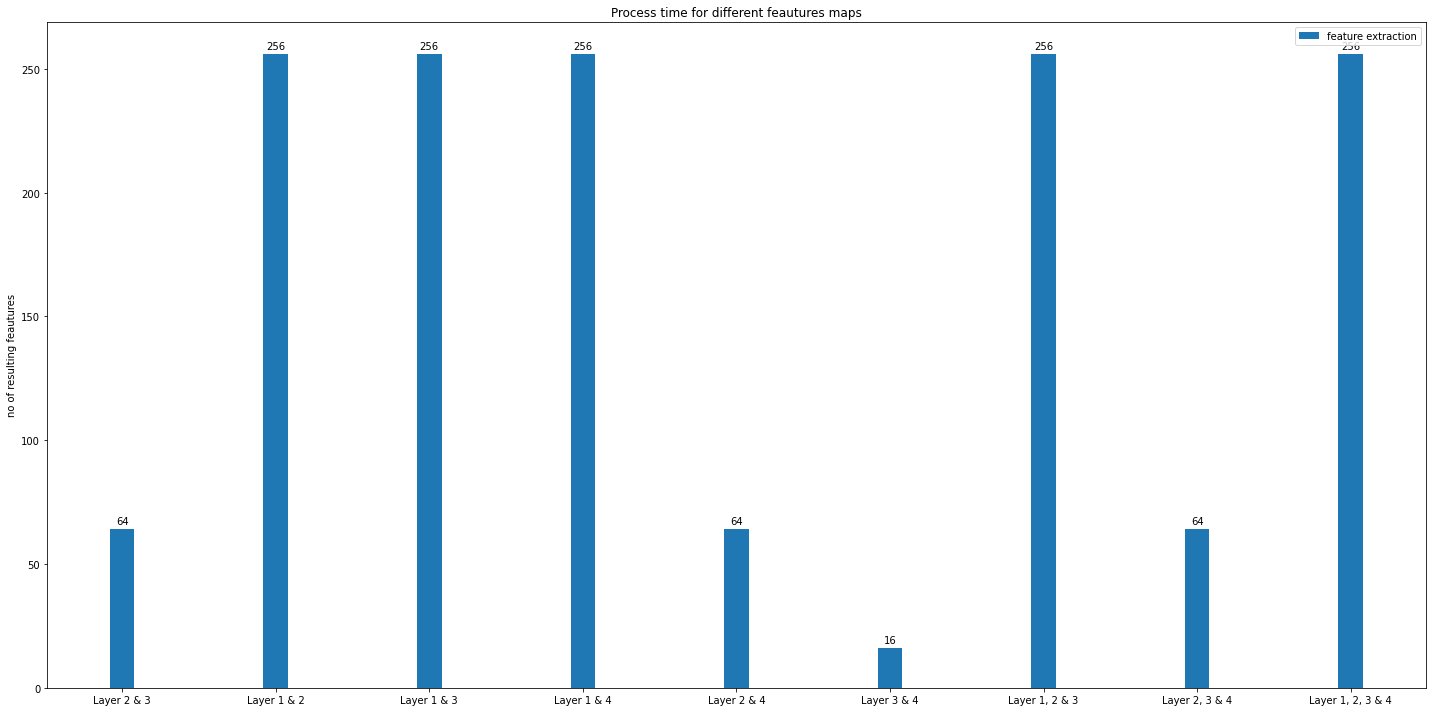

In [27]:
labels = ['Layer 2 & 3', 'Layer 1 & 2', 'Layer 1 & 3', 'Layer 1 & 4', 'Layer 2 & 4', 'Layer 3 & 4', 'Layer 1, 2 & 3', 'Layer 2, 3 & 4', 'Layer 1, 2, 3 & 4']

# base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
base_dir = "C:\\Users\\uwupl\\IIIT Muen\\PatchCore_anomaly_detection"
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

data_1 = pd.read_csv(os.path.join(csv_dir, '23.csv'))
data_2 = pd.read_csv(os.path.join(csv_dir, '12.csv'))
data_3 = pd.read_csv(os.path.join(csv_dir, '13.csv'))
data_4 = pd.read_csv(os.path.join(csv_dir, '14.csv'))
data_5 = pd.read_csv(os.path.join(csv_dir, '24.csv'))
data_6 = pd.read_csv(os.path.join(csv_dir, '34.csv'))
data_7 = pd.read_csv(os.path.join(csv_dir, '123.csv'))
data_8 = pd.read_csv(os.path.join(csv_dir, '234.csv'))
data_9 = pd.read_csv(os.path.join(csv_dir, '1234.csv'))

all_files = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
no_of_features = []
# img_auc = []
# pixel_auc = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]
    no_of_features += [int(file['resulting_features'].mean())]
    
x = np.arange(len(labels))  # the label locations
width = 0.16  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x, no_of_features, width, label='feature extraction')
# rects2 = ax.bar(x - width, embedding_cpu, width, label='embedding')
# rects3 = ax.bar(x, search_memory, width, label='search')
# rects4 = ax.bar(x + 1*width, anomaly_map, width, label='anomaly_map')
# rects5 = ax.bar(x + width*2, total_cpu, width, label='total')
# rects3 = ax.bar(x, )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('no of resulting feautures')
ax.set_title('Process time for different feautures maps')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)
# ax.bar_label(rects5, padding=3)
# ax.bar_label(rects6, padding=3)

fig.tight_layout()

plt.savefig(os.path.join(plot_dir, 'different_feature_maps_resulting_features.svg'), bbox_inches = 'tight')

plt.show()

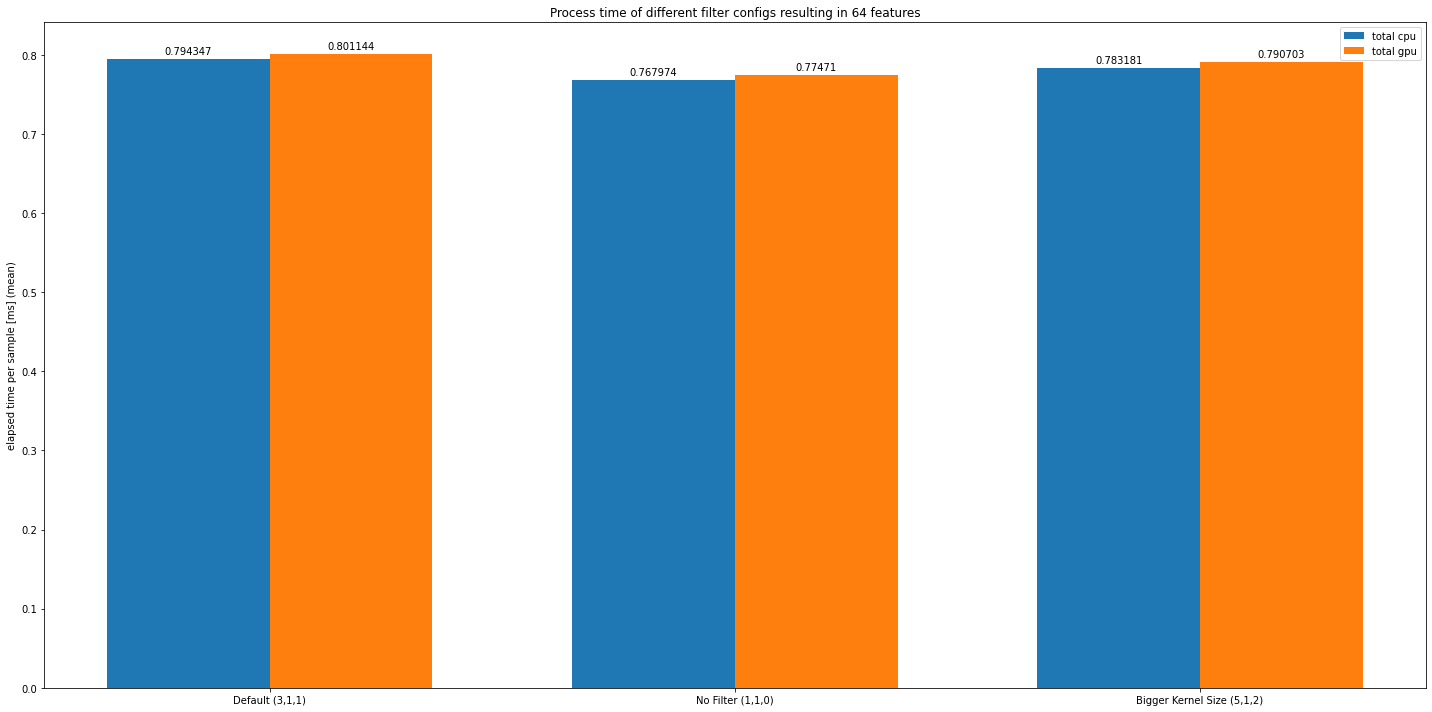

In [8]:
labels = ['Default (3,1,1)', 'No Filter (1,1,0)', 'Bigger Kernel Size (5,1,2)']

base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

data_1 = pd.read_csv(os.path.join(csv_dir, '1234.csv'))
data_2 = pd.read_csv(os.path.join(csv_dir, '123.csv'))
data_3 = pd.read_csv(os.path.join(csv_dir, '234.csv'))


all_files = [data_1, data_2, data_3]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
# prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    # prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]
    
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, total_cpu, width, label='total cpu')
rects2 = ax.bar(x + width/2, total_cuda, width, label='total gpu')
# rects3 = ax.bar(x, )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('elapsed time per sample [ms] (mean)')
ax.set_title('Process time of different filter configs resulting in 64 features')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig(os.path.join(plot_dir, '64_features.svg'), bbox_inches = 'tight')

plt.show()

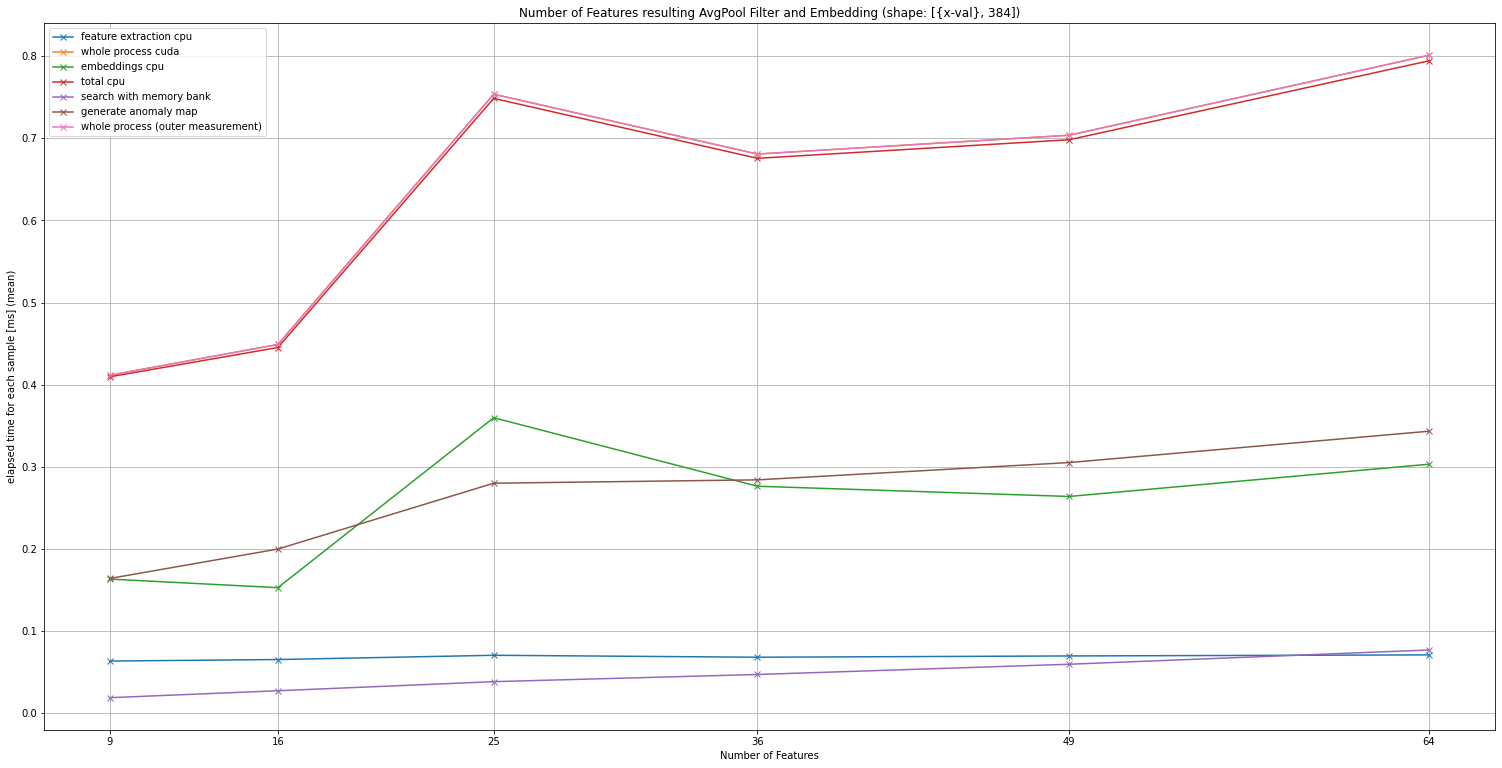

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

base_dir = os.path.dirname(__file__)
# base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

batch_1 = pd.read_csv(os.path.join(csv_dir, 'default.csv'))
batch_2 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_4.csv'))
batch_4 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_5.csv'))
batch_8 = pd.read_csv(os.path.join(csv_dir, 'default_kernel_6.csv'))
batch_16 = pd.read_csv(os.path.join(csv_dir,'default_stride_2.csv'))
batch_32 = pd.read_csv(os.path.join(csv_dir,'default_stride_2_padding_0.csv'))
# batch_64 = pd.read_csv(os.path.join(csv_dir,'batch_64.csv'))[:-1]
# batch_128 = pd.read_csv(os.path.join(csv_dir,'batch_128.csv'))[:-1]

all_files = [batch_1, batch_2, batch_4, batch_8, batch_16, batch_32]#, batch_64, batch_128]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
# prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    # prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [64, 49, 36, 25, 16, 9]#, 4]#, 3]#, 8, 16, 32, 64, 128]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu", marker = 'x')
plt.plot(x_vals,total_cuda, label = "whole process cuda", marker = 'x')
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu", marker = 'x')
plt.plot(x_vals,total_cpu, label = "total cpu", marker = 'x')
plt.plot(x_vals,search_memory, label = "search with memory bank", marker = 'x')
plt.plot(x_vals,anomaly_map, label = "generate anomaly map", marker = 'x')
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)", marker = 'x')
# plt.plot(x_vals,prep_memory_bank, label = "prep memory bank")

# ax.set_xscale('log', base=2)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.xticks(x_vals,['64','49','36','25','16','9'])
plt.title('Number of Features resulting AvgPool Filter and Embedding (shape: [{x-val}, 384])')
plt.xlabel('Number of Features')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'latences_features.svg'), bbox_inches = 'tight')

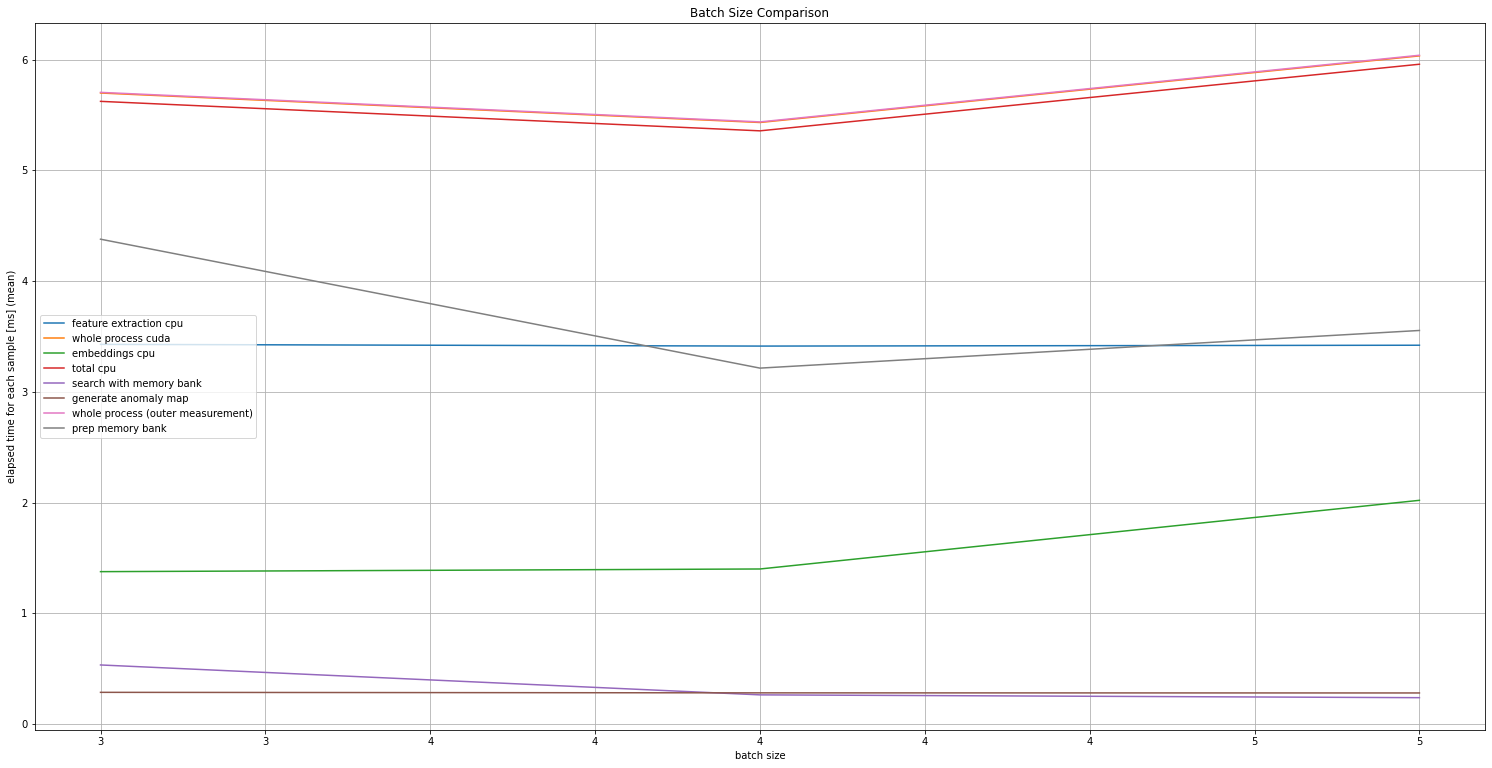

In [28]:
# base_dir = os.path.dirname(__file__)
base_dir = 'D:\\UNI\\IIIT_Muen\\adapted_PactchCore\\PatchCore_anomaly_detection'
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
# batch size

batch_1 = pd.read_csv(os.path.join(csv_dir, 'kernel_3.csv'))[:-1]
batch_2 = pd.read_csv(os.path.join(csv_dir, 'kernel_4.csv'))[:-1]
batch_4 = pd.read_csv(os.path.join(csv_dir, 'kernel_5.csv'))[:-1]
# batch_8 = pd.read_csv(os.path.join(csv_dir,'batch_8.csv'))[:-1]
# batch_16 = pd.read_csv(os.path.join(csv_dir,'batch_16.csv'))[:-1]
# batch_32 = pd.read_csv(os.path.join(csv_dir,'batch_32.csv'))[:-1]
# batch_64 = pd.read_csv(os.path.join(csv_dir,'batch_64.csv'))[:-1]
# batch_128 = pd.read_csv(os.path.join(csv_dir,'batch_128.csv'))[:-1]

all_files = [batch_1, batch_2, batch_4]#, batch_8, batch_16, batch_32, batch_64, batch_128]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [3, 4, 5]#, 8, 16, 32, 64, 128]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu")
plt.plot(x_vals,total_cuda, label = "whole process cuda")
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu")
plt.plot(x_vals,total_cpu, label = "total cpu")
plt.plot(x_vals,search_memory, label = "search with memory bank")
plt.plot(x_vals,anomaly_map, label = "generate anomaly map")
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)")
plt.plot(x_vals,prep_memory_bank, label = "prep memory bank")

# ax.set_xscale('log', base=2)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.title('Batch Size Comparison')
plt.xlabel('batch size')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'latences_kernel.svg'), bbox_inches = 'tight')

In [20]:
m(feauture).size()

torch.Size([32, 256, 2, 2])

In [6]:
base_dir = os.path.dirname(__file__)

NameError: name '__file__' is not defined

In [25]:
base_dir = os.path.dirname(__file__)
result_dir = os.path.join(base_dir, "results")
csv_dir = os.path.join(result_dir, "csv")
plot_dir = os.path.join(result_dir, "plots")

# make dirs
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
# batch size

batch_1 = pd.read_csv(os.path.join(csv_dir, 'batch_1.csv'))[:-1]
batch_2 = pd.read_csv(os.path.join(csv_dir, 'batch_2.csv'))[:-1]
batch_4 = pd.read_csv(os.path.join(csv_dir, 'batch_4.csv'))[:-1]
batch_8 = pd.read_csv(os.path.join(csv_dir,'batch_8.csv'))[:-1]
batch_16 = pd.read_csv(os.path.join(csv_dir,'batch_16.csv'))[:-1]
batch_32 = pd.read_csv(os.path.join(csv_dir,'batch_32.csv'))[:-1]
batch_64 = pd.read_csv(os.path.join(csv_dir,'batch_64.csv'))[:-1]
batch_128 = pd.read_csv(os.path.join(csv_dir,'batch_128.csv'))[:-1]

all_files = [batch_1, batch_2, batch_4, batch_8, batch_16, batch_32, batch_64, batch_128]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [1, 2, 4, 8, 16, 32, 64, 128]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu")
plt.plot(x_vals,total_cuda, label = "whole process cuda")
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu")
plt.plot(x_vals,total_cpu, label = "total cpu")
plt.plot(x_vals,search_memory, label = "search with memory bank")
plt.plot(x_vals,anomaly_map, label = "generate anomaly map")
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)")
plt.plot(x_vals,prep_memory_bank, label = "prep memory bank")

ax.set_xscale('log', base=2)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.title('Batch Size Comparison')
plt.xlabel('batch size')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'latences_batch_size.svg'), bbox_inches = 'tight')


# sampling rate

batch_1 = pd.read_csv(os.path.join(csv_dir,'coreset_sampling_rate_1_percent.csv'))[:-1]
batch_2 = pd.read_csv(os.path.join(csv_dir,'coreset_sampling_rate_5_percent.csv'))[:-1]
batch_4 = pd.read_csv(os.path.join(csv_dir,'coreset_sampling_rate_10_percent.csv'))[:-1]
batch_8 = pd.read_csv(os.path.join(csv_dir,'coreset_sampling_rate_50_percent.csv'))[:-1]
batch_16 = pd.read_csv(os.path.join(csv_dir,'coreset_sampling_rate_100_percent.csv'))[:-1]
# batch_32 = pd.read_csv('batch_32.csv')[:-1]
# batch_64 = pd.read_csv('batch_64.csv')[:-1]
# batch_128 = pd.read_csv('batch_128.csv')[:-1]

all_files = [batch_1, batch_2, batch_4, batch_8, batch_16]#, batch_32, batch_64, batch_128]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [1, 5, 10, 50, 100]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu", marker = "x")
plt.plot(x_vals,total_cuda, label = "whole process cuda", marker = "x")
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu", marker = "x")
plt.plot(x_vals,total_cpu, label = "total cpu", marker = "x")
plt.plot(x_vals,search_memory, label = "search with memory bank", marker = "x")
plt.plot(x_vals,anomaly_map, label = "generate anomaly map", marker = "x")
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)", marker = "x")
plt.plot(x_vals,prep_memory_bank, label = "prep memory bank", marker = "x")

ax.set_xscale('log', base=10)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter())

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.title('Coreset Subsampling Rate Comparison')
plt.xlabel('Rate [%]')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'latences_smapling_rate.svg'), bbox_inches = 'tight')


# k of kNN

batch_1 = pd.read_csv(os.path.join(csv_dir,'knn_1.csv'))[:-1]
batch_2 = pd.read_csv(os.path.join(csv_dir,'knn_2.csv'))[:-1]
batch_4 = pd.read_csv(os.path.join(csv_dir,'knn_3.csv'))[:-1]
batch_8 = pd.read_csv(os.path.join(csv_dir,'knn_4.csv'))[:-1]
batch_16 = pd.read_csv(os.path.join(csv_dir,'knn_5.csv'))[:-1]
batch_32 = pd.read_csv(os.path.join(csv_dir,'knn_6.csv'))[:-1]
batch_64 = pd.read_csv(os.path.join(csv_dir,'knn_7.csv'))[:-1]
batch_128 = pd.read_csv(os.path.join(csv_dir,'knn_8.csv'))[:-1]
batch_128_1 = pd.read_csv(os.path.join(csv_dir,'knn_9.csv'))[:-1]
batch_128_2 = pd.read_csv(os.path.join(csv_dir,'knn_10.csv'))[:-1]
batch_128_3 = pd.read_csv(os.path.join(csv_dir,'knn_11.csv'))[:-1]
batch_128_4 = pd.read_csv(os.path.join(csv_dir,'knn_12.csv'))[:-1]
batch_128_5 = pd.read_csv(os.path.join(csv_dir,'knn_13.csv'))[:-1]
batch_128_6 = pd.read_csv(os.path.join(csv_dir,'knn_14.csv'))[:-1]
batch_128_7 = pd.read_csv(os.path.join(csv_dir,'knn_15.csv'))[:-1]
batch_128_8 = pd.read_csv(os.path.join(csv_dir,'knn_20.csv'))[:-1]
batch_128_9 = pd.read_csv(os.path.join(csv_dir,'knn_30.csv'))[:-1]


all_files = [batch_1, batch_2, batch_4, batch_8, batch_16, batch_32, batch_64, batch_128, batch_128_1, batch_128_2, batch_128_3, batch_128_4, batch_128_5, batch_128_6, batch_128_7, batch_128_8, batch_128_9]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,20,30]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu", marker = "x")
plt.plot(x_vals,total_cuda, label = "whole process cuda", marker = "x")
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu", marker = "x")
plt.plot(x_vals,total_cpu, label = "total cpu", marker = "x")
plt.plot(x_vals,search_memory, label = "search with memory bank", marker = "x")
plt.plot(x_vals,anomaly_map, label = "generate anomaly map", marker = "x")
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)", marker = "x")
plt.plot(x_vals,prep_memory_bank, label = "prep memory bank", marker = "x")

# ax.set_xscale('log', base=2)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.title('Number of NNs (k)')
plt.xlabel('k')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'latences_k_of_kNN.svg'), bbox_inches = 'tight')


# Input / Load Size

batch_1 = pd.read_csv(os.path.join(csv_dir,'input_load_8.csv'))[:-1]
batch_2 = pd.read_csv(os.path.join(csv_dir,'input_load_16.csv'))[:-1]
batch_4 = pd.read_csv(os.path.join(csv_dir,'input_load_32.csv'))[:-1]
batch_8 = pd.read_csv(os.path.join(csv_dir,'input_load_64.csv'))[:-1]
batch_16 = pd.read_csv(os.path.join(csv_dir,'input_load_128.csv'))[:-1]
batch_32 = pd.read_csv(os.path.join(csv_dir,'batch_256.csv'))[:-1]
batch_64 = pd.read_csv(os.path.join(csv_dir,'batch_320.csv'))[:-1]
# batch_128 = pd.read_csv('batch_128.csv')[:-1]

all_files = [batch_1, batch_2, batch_4, batch_8, batch_16]#, batch_32, batch_64, batch_128]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [8, 16, 32, 64, 128, 256, 320]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu", marker = "x")
plt.plot(x_vals,total_cuda, label = "whole process cuda", marker = "x")
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu", marker = "x")
plt.plot(x_vals,total_cpu, label = "total cpu", marker = "x")
plt.plot(x_vals,search_memory, label = "search with memory bank", marker = "x")
plt.plot(x_vals,anomaly_map, label = "generate anomaly map", marker = "x")
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)", marker = "x")
plt.plot(x_vals,prep_memory_bank, label = "prep memory bank", marker = "x")

ax.set_xscale('log', base=2)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.title('Input- (Load-) Size')
plt.xlabel('Size [px]')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'input_load_size.svg'), bbox_inches = 'tight')


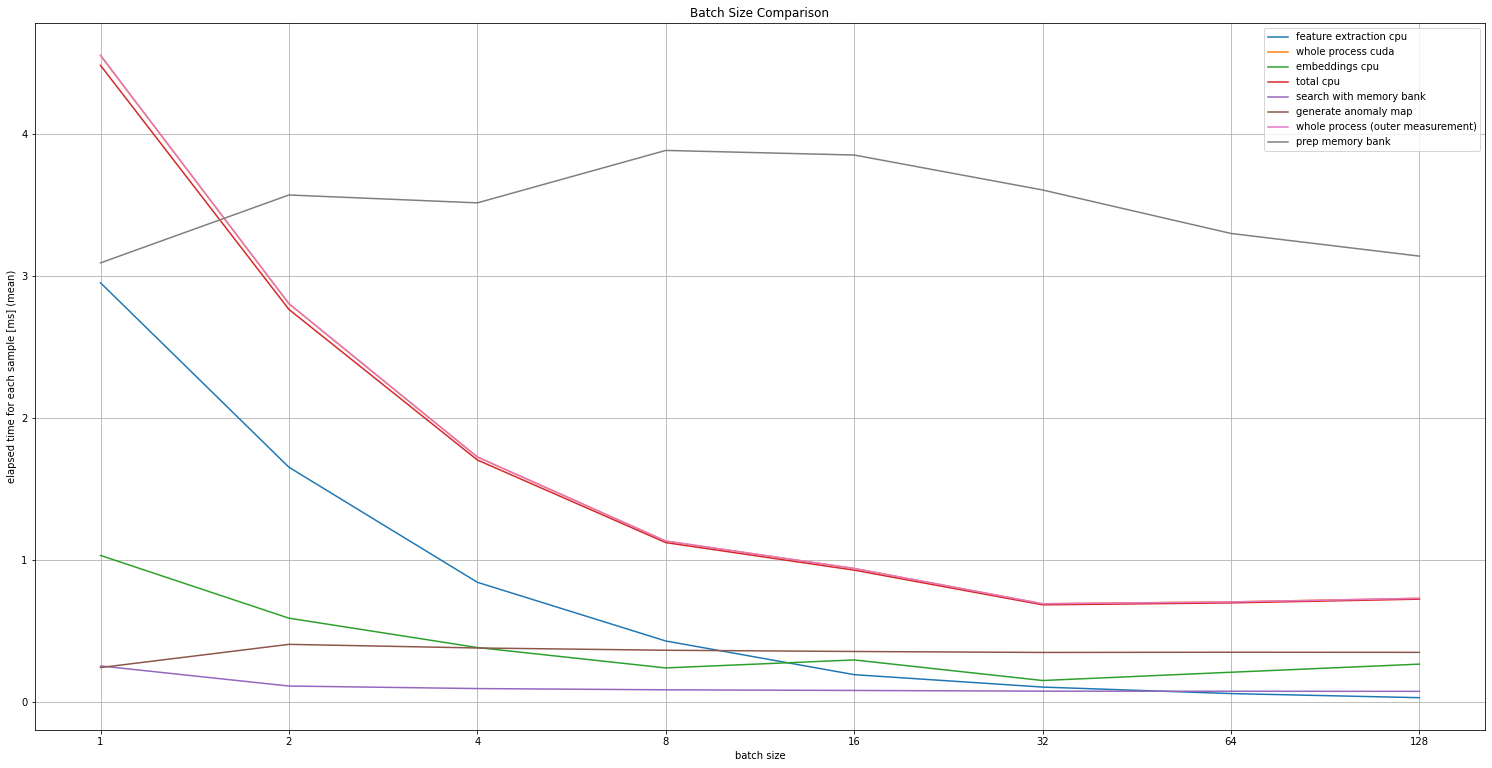

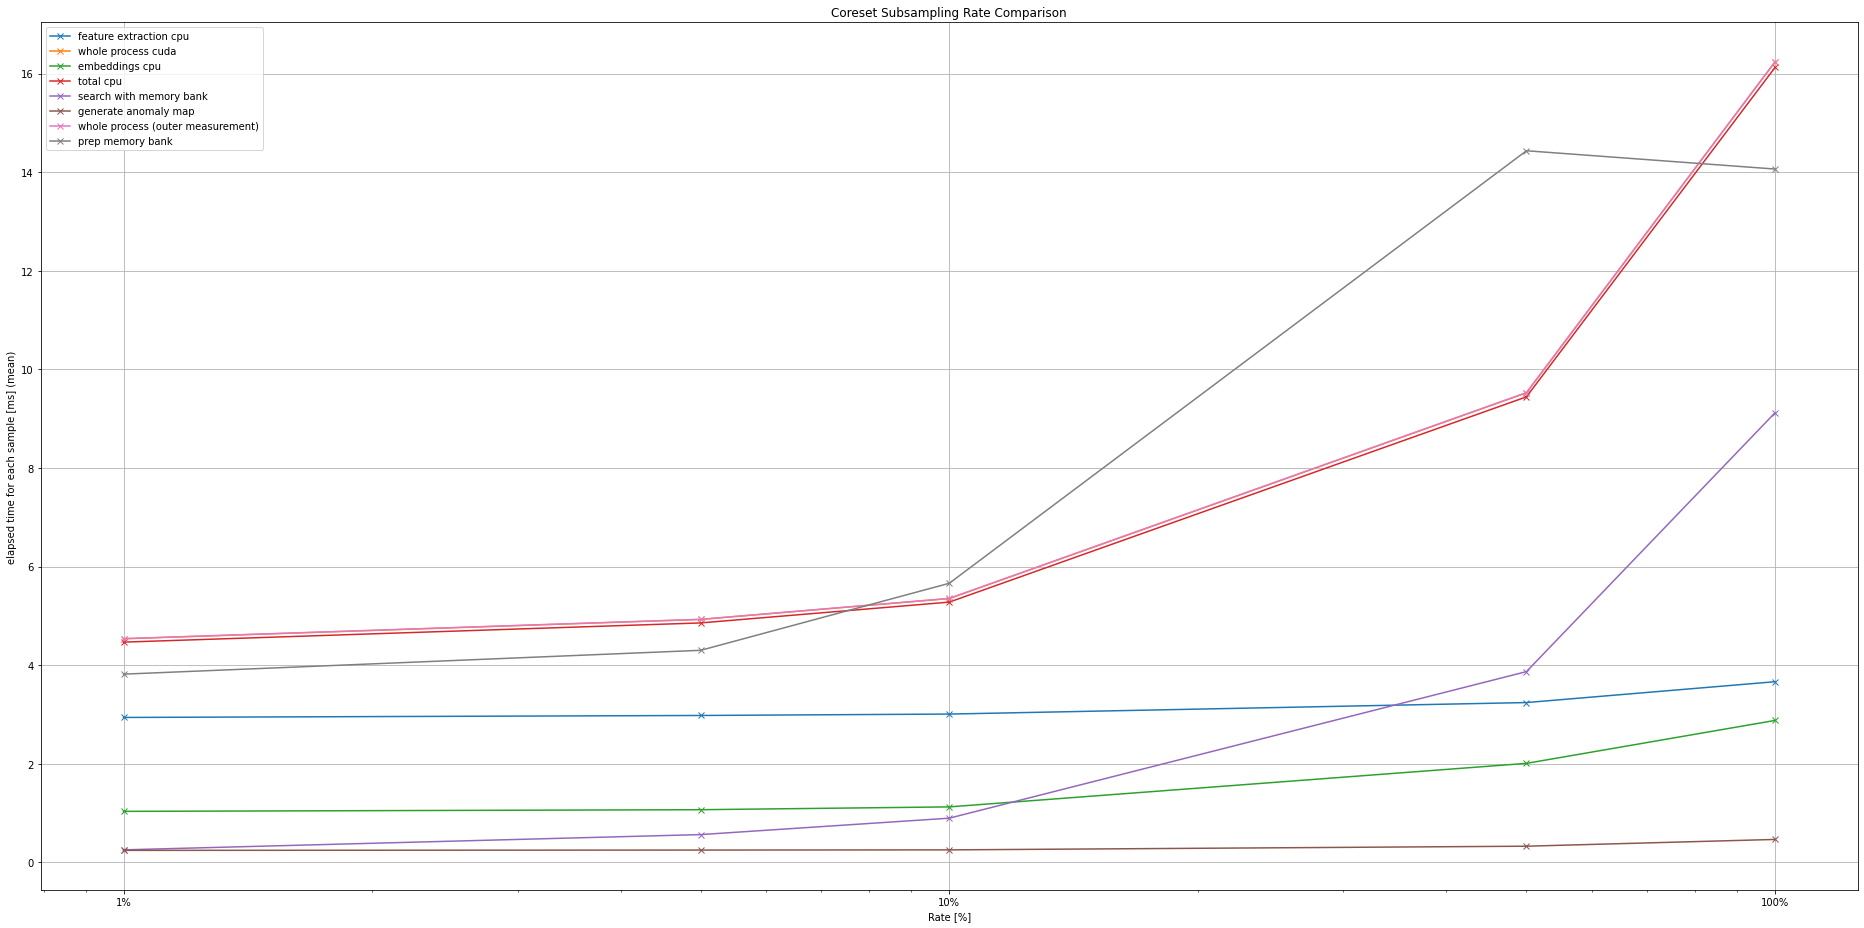

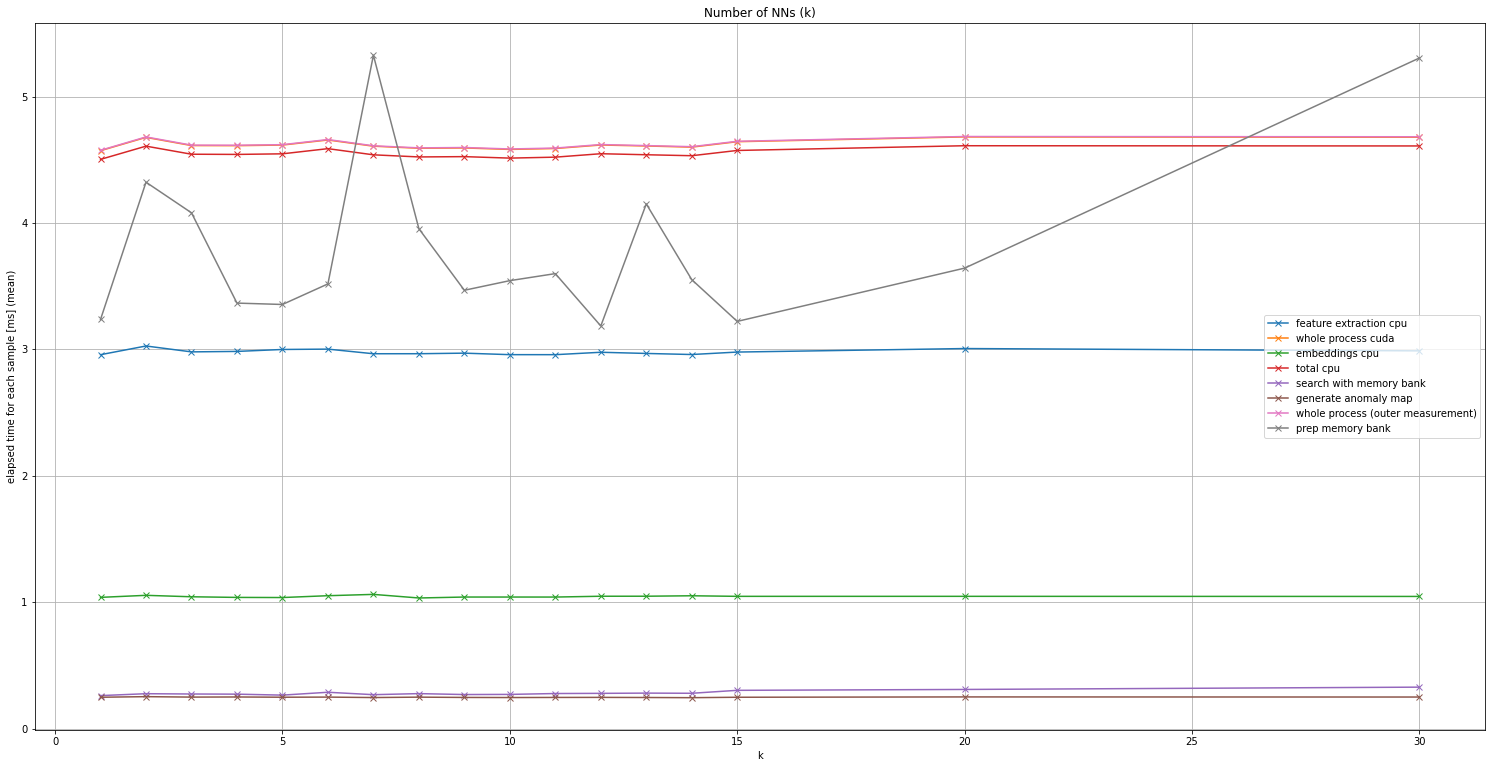

<Figure size 432x288 with 0 Axes>

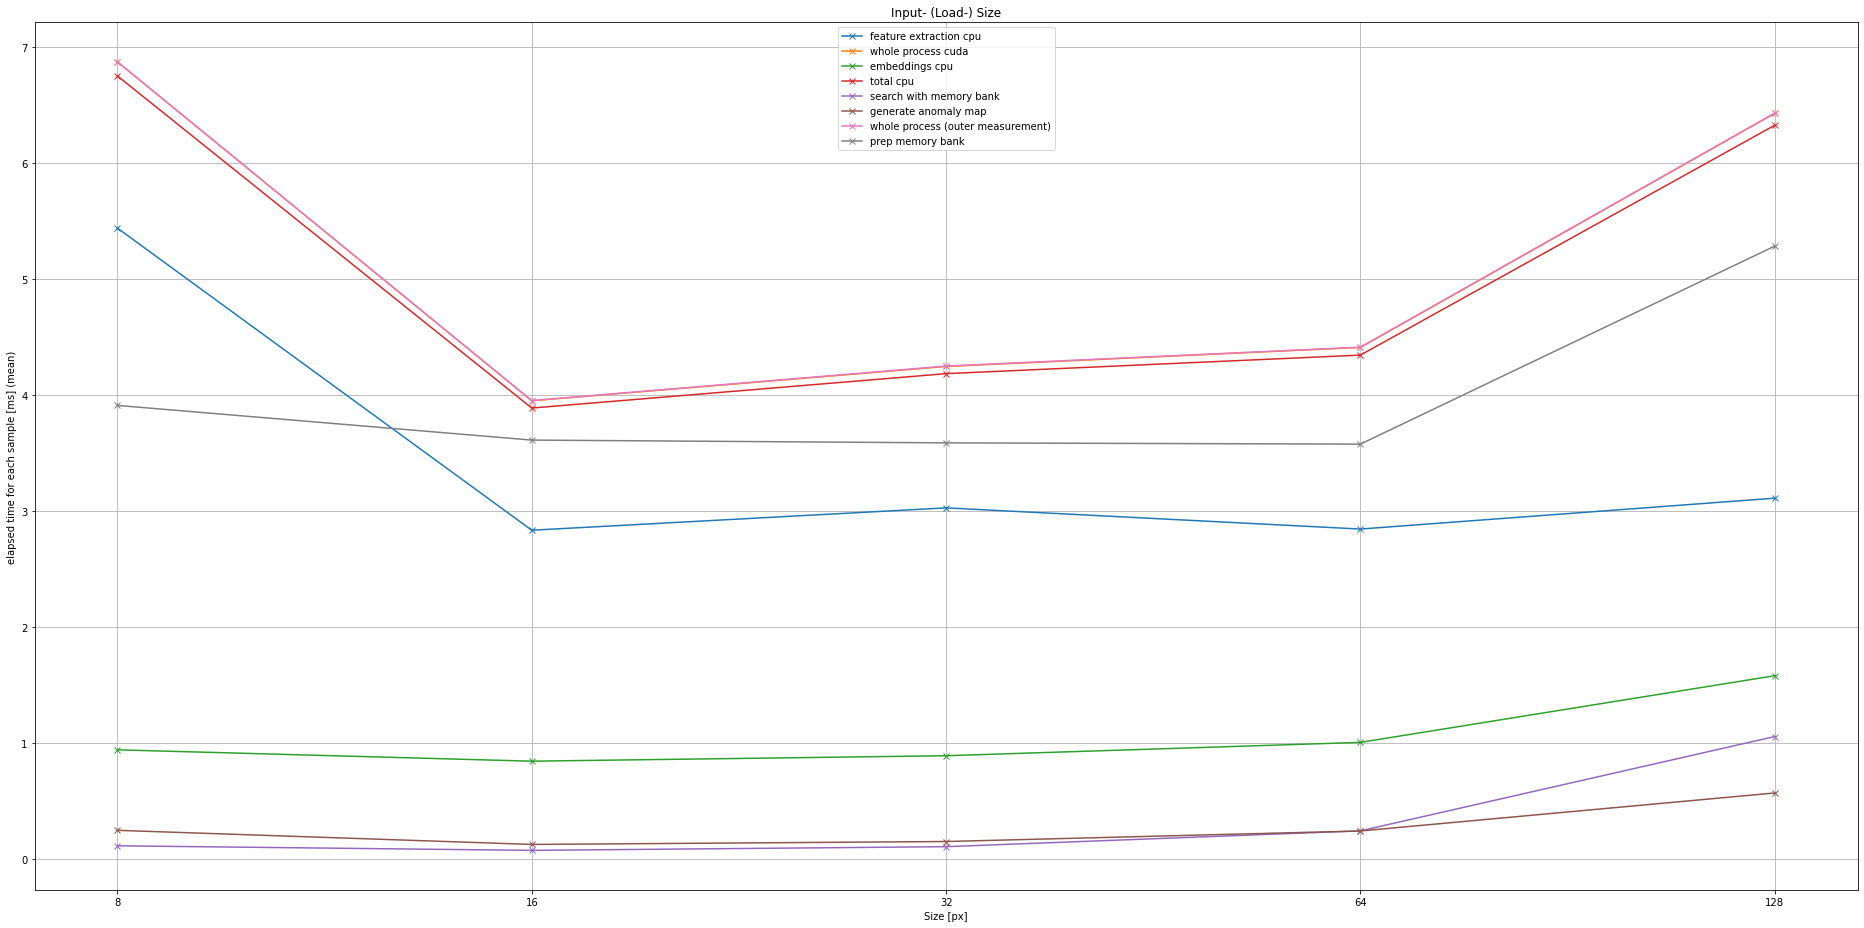

In [24]:
# Input / Load Size

batch_1 = pd.read_csv('input_load_8.csv')
batch_2 = pd.read_csv('input_load_16.csv')[:-1]
batch_4 = pd.read_csv('input_load_32.csv')[:-1]
batch_8 = pd.read_csv('input_load_64.csv')[:-1]
batch_16 = pd.read_csv('input_load_128.csv')[:-1]
batch_32 = pd.read_csv('batch_256.csv')[:-1]
batch_64 = pd.read_csv('batch_320.csv')[:-1]
# batch_128 = pd.read_csv('batch_128.csv')[:-1]

all_files = [batch_1, batch_2, batch_4, batch_8, batch_16]#, batch_32, batch_64, batch_128]

feature_extraction_cpu = []
embedding_cpu = []
total_cpu = []
search_memory = []
anomaly_map = []
whole_process = []
total_cuda = []
prep_memory_bank = []
for file in all_files:
    feature_extraction_cpu += [file['#1 feature extraction cpu'].mean()]
    embedding_cpu += [file['#3 embedding of features cpu'].mean()]
    search_memory += [file['#5 search with memory bank cpu'].mean()]
    total_cpu += [file['#9 sum cpu'].mean()]
    anomaly_map += [file['#7 anomaly map cpu'].mean()]
    whole_process += [file['#11 whole process cpu'].mean()]
    prep_memory_bank += [file['#13 preparation memory bank'].mean()]
    total_cuda += [file['#12 whole process gpu'].mean()]

fig = plt.figure(figsize=(26,13))

ax = fig.add_subplot()

# line, = ax1.plot([1, 2, 4, 8, 16, 32, 64, 128], feature_extraction_cpu)
# line, = ax2.plot([1, 2, 4, 8, 16, 32, 64, 128], embedding_cpu)
x_vals = [8, 16, 32, 64, 128, 256, 320]
plt.plot(x_vals,feature_extraction_cpu, label = "feature extraction cpu", marker = "x")
plt.plot(x_vals,total_cuda, label = "whole process cuda", marker = "x")
plt.plot(x_vals,embedding_cpu, label = "embeddings cpu", marker = "x")
plt.plot(x_vals,total_cpu, label = "total cpu", marker = "x")
plt.plot(x_vals,search_memory, label = "search with memory bank", marker = "x")
plt.plot(x_vals,anomaly_map, label = "generate anomaly map", marker = "x")
plt.plot(x_vals,whole_process, label = "whole process (outer measurement)", marker = "x")
plt.plot(x_vals,prep_memory_bank, label = "prep memory bank", marker = "x")

ax.set_xscale('log', base=2)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# fig.set_label = 'Batch Size'
# plt.set_label = 'Batch Size'
plt.title('Input- (Load-) Size')
plt.xlabel('Size [px]')
plt.ylabel('elapsed time for each sample [ms] (mean)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plot_dir, 'input_load_size.svg'), bbox_inches = 'tight')


In [79]:
batch_4

,Unnamed: 0,#1 feature extraction cpu,#2 feature extraction gpu,#3 embedding of features cpu,#4 embedding of features gpu,#5 search with memory bank cpu,#6 search with memory bank gpu,#7 anomaly map cpu,#8 anomaly map gpu,#9 sum cpu,#10 sum gpu,#11 whole process cpu,#12 whole process gpu,#13 preparation memory bank,batch_size,input_size,coreset_sampling_ratio,n_neighbors,patch_size
0,0,1.362429,1.424744,0.430243,0.374328,0.150512,0.148255,0.634930,0.638767,2.578114,2.586094,2.610519,2.610598,3.51496,4,64,0.01,9,default
1,1,0.829539,0.930960,0.337967,0.240096,0.092629,0.091300,0.376963,0.379294,1.637098,1.641649,1.657876,1.657589,3.51496,4,64,0.01,9,default
2,2,0.827140,0.951194,0.369908,0.248866,0.092546,0.091376,0.382402,0.384900,1.671996,1.676336,1.693139,1.692684,3.51496,4,64,0.01,9,default
3,3,0.832511,0.969533,0.380930,0.247570,0.094249,0.092725,0.385715,0.388229,1.693405,1.698057,1.714626,1.714901,3.51496,4,64,0.01,9,default
4,4,0.847148,0.983345,0.379327,0.247101,0.094357,0.092917,0.382101,0.384112,1.702934,1.707475,1.723982,1.723633,3.51496,4,64,0.01,9,default
5,5,0.835215,0.969984,0.376411,0.245248,0.093748,0.092381,0.384898,0.387469,1.690272,1.695081,1.711613,1.711384,3.51496,4,64,0.01,9,default
6,6,0.829426,0.965946,0.379231,0.245929,0.093796,0.092549,0.370739,0.372966,1.673193,1.677389,1.694224,1.693487,3.51496,4,64,0.01,9,default
7,7,0.837381,0.975393,0.385529,0.251282,0.094920,0.093502,0.379961,0.382264,1.697791,1.702440,1.718795,1.718918,3.51496,4,64,0.01,9,default
8,8,0.828757,0.967959,0.384869,0.249322,0.094721,0.093632,0.372124,0.374122,1.680470,1.685036,1.701243,1.701181,3.51496,4,64,0.01,9,default
9,9,0.829868,0.968643,0.383610,0.248367,0.094704,0.093497,0.371853,0.373997,1.680036,1.684504,1.700887,1.700451,3.51496,4,64,0.01,9,default


In [27]:
def get_args():
    parser = argparse.ArgumentParser(description='ANOMALYDETECTION')
    parser.add_argument('--phase', choices=['train','test'], default='train')
    parser.add_argument('--dataset_path', default=r'./mvtec_anomaly_detection')#./MVTec') # 'D:\Dataset\mvtec_anomaly_detection')#
    parser.add_argument('--category', default='own')
    parser.add_argument('--num_epochs', default=1) # 1 iteration is enough
    parser.add_argument('--batch_size', default=32) # just for train; for test always 1 l.351
    parser.add_argument('--load_size', default=64) 
    parser.add_argument('--input_size', default=64) # using same input size and load size for our data
    parser.add_argument('--coreset_sampling_ratio', default=0.01)
    parser.add_argument('--project_root_path', default=r'./test') # location to save result
    parser.add_argument('--save_src_code', default=True) 
    parser.add_argument('--save_anomaly_map', default=True)
    parser.add_argument('--n_neighbors', type=int, default=9)
    parser.add_argument('--propotion', type=int, default=452) # number of training samples used, default 452=all samples 
    parser.add_argument('--pre_weight', default='imagenet')
    parser.add_argument('--accelerator', default=None)
    parser.add_argument('--devices', default=None)
    # editable
    args = parser.parse_args()
    return args

In [29]:
args = get_args()

usage: ipykernel_launcher.py [-h] [--phase {train,test}]
                             [--dataset_path DATASET_PATH]
                             [--category CATEGORY] [--num_epochs NUM_EPOCHS]
                             [--batch_size BATCH_SIZE] [--load_size LOAD_SIZE]
                             [--input_size INPUT_SIZE]
                             [--coreset_sampling_ratio CORESET_SAMPLING_RATIO]
                             [--project_root_path PROJECT_ROOT_PATH]
                             [--save_src_code SAVE_SRC_CODE]
                             [--save_anomaly_map SAVE_ANOMALY_MAP]
                             [--n_neighbors N_NEIGHBORS]
                             [--propotion PROPOTION] [--pre_weight PRE_WEIGHT]
                             [--accelerator ACCELERATOR] [--devices DEVICES]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"a82001ec-d137-4abb-8

SystemExit: 2

In [2]:
a = {'#1 feature extraction cpu': 0.3810288332897471, '#2 feature extraction gpu': 0.33595359921455387, '#3 embedding of features cpu': 0.19991250004143998, '#4 embedding of features gpu': 0.19233589371045431, '#5 search with memory bank cpu': 0.12988833324925508, '#6 search with memory bank gpu': 0.12916522681713105, '#7 anomaly map cpu': 0.4589025000435261, '#8 anomaly map gpu': 0.45963199853897097, '#9 sum cpu': 1.1697321666239684, '#10 sum gpu': 1.1170867188771567, '#11 whole process cpu': 1.194035666618826, '#12 whole process gpu': 1.1391432491938274}

In [17]:
for k in range(5):
    if k==0:
        b = pd.DataFrame(a, index=[k])
        b.to_csv('test.csv')
        continue
    pd_ = pd.DataFrame(a, index=[k])
    b = pd.read_csv('test.csv', index_col=0)
    b = pd.concat([b,pd_], axis=0)
    b.to_csv('test.csv')

In [35]:
str(_preparation_memory_bank.csv)

NameError: name '_preparation_memory_bank' is not defined

In [43]:
pd.read_csv('latences.csv', index_col=0)[0::5]

,#1 feature extraction cpu,#2 feature extraction gpu,#3 embedding of features cpu,#4 embedding of features gpu,#5 search with memory bank cpu,#6 search with memory bank gpu,#7 anomaly map cpu,#8 anomaly map gpu,#9 sum cpu,#10 sum gpu,#11 whole process cpu,#12 whole process gpu,#13 preparation memory bank,batch_size,input_size,coreset_sampling_ratio,n_neighbors,patch_size
0,0.459503,0.525075,0.257441,0.194128,0.114752,0.114157,0.532174,0.533487,1.363871,1.366848,1.376533,1.376419,3.88604,10,64,0.01,9,default
5,0.323279,0.394460,0.212500,0.142882,0.081616,0.081406,0.373957,0.374755,0.991352,0.993503,1.000715,1.000696,3.88604,10,64,0.01,9,default
10,0.320644,0.405596,0.222836,0.139377,0.081895,0.081500,0.358868,0.360181,0.984243,0.986655,0.993745,0.993845,3.88604,10,64,0.01,9,default
15,0.319173,0.403927,0.222544,0.138993,0.081350,0.080805,0.358543,0.360125,0.981610,0.983850,0.991264,0.991155,3.88604,10,64,0.01,9,default
20,0.321210,0.397348,0.215037,0.139881,0.081232,0.080749,0.359639,0.360969,0.977118,0.978947,0.986555,0.986124,3.88604,10,64,0.01,9,default
3,0.536631,0.596129,0.129243,0.072301,0.028284,0.027359,0.107785,0.109226,0.801944,0.805015,0.815688,0.815372,3.11222,10,8,0.01,9,default
8,0.636729,0.694682,0.138042,0.083337,0.034781,0.033970,0.137438,0.138878,0.946990,0.950867,0.962632,0.963351,3.11222,10,8,0.01,9,default
13,0.531867,0.588412,0.124848,0.071009,0.029990,0.029284,0.105553,0.106656,0.792257,0.795361,0.806203,0.806080,3.11222,10,8,0.01,9,default
18,0.543941,0.602340,0.128553,0.073070,0.029336,0.028318,0.111224,0.112300,0.813054,0.816029,0.827474,0.828048,3.11222,10,8,0.01,9,default
1,0.365367,0.394291,0.157137,0.129812,0.037556,0.037148,0.174299,0.174940,0.734359,0.736192,0.743933,0.743845,2.77078,10,32,0.01,9,default


In [18]:
b

,#1 feature extraction cpu,#2 feature extraction gpu,#3 embedding of features cpu,#4 embedding of features gpu,#5 search with memory bank cpu,#6 search with memory bank gpu,#7 anomaly map cpu,#8 anomaly map gpu,#9 sum cpu,#10 sum gpu,#11 whole process cpu,#12 whole process gpu
0,0.381029,0.335954,0.199913,0.192336,0.129888,0.129165,0.458903,0.459632,1.169732,1.117087,1.194036,1.139143
1,0.381029,0.335954,0.199913,0.192336,0.129888,0.129165,0.458903,0.459632,1.169732,1.117087,1.194036,1.139143
2,0.381029,0.335954,0.199913,0.192336,0.129888,0.129165,0.458903,0.459632,1.169732,1.117087,1.194036,1.139143
3,0.381029,0.335954,0.199913,0.192336,0.129888,0.129165,0.458903,0.459632,1.169732,1.117087,1.194036,1.139143
4,0.381029,0.335954,0.199913,0.192336,0.129888,0.129165,0.458903,0.459632,1.169732,1.117087,1.194036,1.139143


In [8]:
pd.read_csv('test_latences.csv')

,Unnamed: 0.18,Unnamed: 0.17,Unnamed: 0.16,Unnamed: 0.15,Unnamed: 0.14,Unnamed: 0.13,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,Unnamed: 0.9,...,#3 embedding of features cpu,#4 embedding of features gpu,#5 search with memory bank cpu,#6 search with memory bank gpu,#7 anomaly map cpu,#8 anomaly map gpu,#9 sum cpu,#10 sum gpu,#11 whole process cpu,#12 whole process gpu
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.218703,0.198331,0.109441,0.108841,0.464522,0.465341,1.133203,1.084824,1.151612,1.101442
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.297713,0.175114,0.080811,0.080359,0.358078,0.358721,0.988368,0.952559,1.002706,0.965588
2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.325480,0.181439,0.080983,0.080444,0.356185,0.356908,1.017458,0.980723,1.032667,0.994562
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.320624,0.179724,0.080601,0.080101,0.353663,0.354373,1.007756,0.972178,1.022100,0.985208
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.308893,0.177801,0.082010,0.081532,0.349795,0.350470,0.992171,0.956874,1.006886,0.970240
5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0.334797,0.182941,0.082572,0.082189,0.352220,0.352800,1.024350,0.987924,1.039726,1.002005
6,6,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,0.320457,0.181892,0.082102,0.081722,0.355062,0.355645,1.009926,0.974327,1.023899,0.987002
7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,0.320400,0.180003,0.082879,0.082401,0.350112,0.350764,1.002569,0.967727,1.016880,0.980803
8,8,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,0.318106,0.179860,0.082263,0.081788,0.352799,0.353520,1.005513,0.969941,1.020281,0.983405
9,9,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,0.329175,0.177599,0.082015,0.081553,0.354605,0.355243,1.016489,0.981468,1.029863,0.993478
